# ALL_RSS

### Given that RSS FEEDs update frequently we need to find a way to include the new jobs into the current DB without losing the "old" jobs.

#### Key DataFrames:

######  df = current output of crawler

###### df_a = the previous output of crawler

##### df1_copy = df + df_a (saved to be used by df_a in next iteration)

##### df1 = df + df_a  -> final df 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/juanreyesgarcia/Library/CloudStorage/OneDrive-FundacionUniversidaddelasAmericasPuebla/DEVELOPER/PROJECTS/CRAWLER_ALL/yummy_soup_rss.csv')

In [3]:
df_a = pd.read_csv('/Users/juanreyesgarcia/Library/CloudStorage/OneDrive-FundacionUniversidaddelasAmericasPuebla/DEVELOPER/PROJECTS/CRAWLER_ALL/DRAFTS/yummy_soup_rss_copy.csv')

##### Play with the settings...

In [4]:
pd.set_option('display.max_colwidth', 150)

In [5]:
pd.set_option("display.max_rows", None)

# EDA Checklist 

In [6]:
df.head()

,title,link,description,pubDate,location
0,Senior Software Engineer CIS Cloud Services Centripetal,https://ClojureJobboard.com/clojure-job/ha-remote-senior-software-engineer-cis-cloud-services-centripetal-remotework.html,Remote Do you want to be at the forefront of intelligencedriven cybersecurity We at Centripetal are innovators of disruptive cybersecurity soluti...,NaN,NaN
1,FullStack Clojure Developer Appear,https://ClojureJobboard.com/clojure-job/ia-remote-europe-full-stack-clojure-developer-appear-remotework.html,Remote At Appear were looking for a FullStack Clojure Developer to join our team Fulltime Oslo OR Remote About the role Were looking for a Cloju...,NaN,NaN
2,Software Engineer Clojure Backend Comcast,https://ClojureJobboard.com/clojure-job/ic-software-engineer-clojure-backend-philadelphia-comcast.html,Philadelphia United States Comcasts Technology Product Experience organization works at the intersection of media and technology Our innovative ...,NaN,NaN
3,Senior Application Developer Clojure Pennymac,https://ClojureJobboard.com/clojure-job/ii-senior-application-developer-clojure-agoura-hills-pennymac.html,Agoura Hills United States At Pennymac our people are the foundation of our success and at the heart of our dynamic work culture Together we work...,NaN,NaN
4,Senior Clojure Developer TheHumbleAI,https://ClojureJobboard.com/clojure-job/ih-remote-europe-senior-clojure-developer-thehumbleai-remotework.html,Remote Location RemoteHybrid Flexible Locations within a 2 hours from the UK We are looking for an experienced Senior Clojure Developer to join ...,NaN,NaN


In [7]:
df.tail()

,title,link,description,pubDate,location
1361,WordPress server resources developer,https://jobs.wordpress.net/job/wordpress-server-resources-developer/,We are facing a very low speed on the products import We are using WiseXML platform with their Woocommerce plugin The platform works ok the speed ...,Mon 20 Feb 2023 130851 0000,NaN
1362,WordPress designer and developer,https://jobs.wordpress.net/job/wordpress-designer-and-developer-4/,We have a voice telephony platform and we need a website to promote it To begin with we will stat with design of a single product page and if the ...,Mon 20 Feb 2023 130840 0000,NaN
1363,Sr Software Developer PHP WordPress with 2 5 years of experience,https://jobs.wordpress.net/job/sr-software-developer-php-wordpress-with-2-5-years-of-experience/,Job Role 8211 Senior Software WordPress Developer Job Summary The software engineer will be responsible for both backend and frontend development ...,Mon 20 Feb 2023 130830 0000,NaN
1364,Full Stack LAMPMERN WordPress EngineerDeveloper,https://jobs.wordpress.net/job/full-stack-lamp-mern-wordpress-engineer-developer/,About Us Rehab Media Network RMN is a dynamic and rapidly growing company with a unique startup vibe Our team is comprised of selfstarters who are...,Mon 20 Feb 2023 130814 0000,NaN
1365,Full stack WordPress and woocommerce developer,https://jobs.wordpress.net/job/full-stack-wordpress-and-woocommerce-developer/,Fullstack WooCommerce and WordPress Developer Senior Hyderabad India Job Details Fulltime Estimated Salary Rs 50000 to 1 lakh per month Are you s...,Mon 20 Feb 2023 004357 0000,NaN


### Describe the DF (current)

In [8]:
df.describe()

,title,link,description,pubDate,location
count,1366,1366,1145,1191,621
unique,1253,1366,1109,1124,165
top,Senior Software Engineer,https://ClojureJobboard.com/clojure-job/ha-remote-senior-software-engineer-cis-cloud-services-centripetal-remotework.html,United States,Thu 23 Feb 2023 000000 GMT,Remote
freq,7,1,10,7,86


### Describe DF_a (previous)

In [9]:
df_a.describe()

,title,link,description,pubDate,location
count,1063,1063,927,748,391
unique,976,1063,889,31,117
top,Senior Software Engineer,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,United States,2023-02-23,Worldwide
freq,9,1,6,78,87


### Checking for missing values DF (current)

In [10]:
df.isnull().sum()

title            0
link             0
description    221
pubDate        175
location       745
dtype: int64

### Checking for missing values DF_a (previous)

In [11]:
df_a.isnull().sum()

title            0
link             0
description    136
pubDate        315
location       672
dtype: int64

### Fill missing values with "NaN" DF (current)

In [12]:
# Fill missing values with "NaN"
df.fillna("NaN", inplace=True)

In [13]:
df.isnull().sum()

title          0
link           0
description    0
pubDate        0
location       0
dtype: int64

### Fill missing values with "NaN" DF_a (previous)

In [14]:
# Fill missing values with "NaN"
df_a.fillna("NaN", inplace=True)

In [15]:
df_a.isnull().sum()

title          0
link           0
description    0
pubDate        0
location       0
dtype: int64

### Checking for duplicates DF (current)

In [16]:
df.duplicated().sum()

0

### Checking for duplicates DF_a (previous)

In [17]:
df_a.duplicated().sum()

0

# From string to date time...

In [18]:
df_a.loc[:, 'pubDate']  = pd.to_datetime(df_a['pubDate'], errors="coerce", format="%a %d %b %Y", exact=False)
df.loc[:, 'pubDate']  = pd.to_datetime(df['pubDate'], errors="coerce", format="%a %d %b %Y", exact=False)

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/1459423331.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_a.loc[:, 'pubDate']  = pd.to_datetime(df_a['pubDate'], errors="coerce", format="%a %d %b %Y", exact=False)
/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/1459423331.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'pubDate']  = pd.to_datetime(df['pubDate'], errors="coerce", format="%a %d %b %Y", exact=False)


## Filter rows by a date range

In [19]:
# filter rows by a date range
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2023-01-24')

#for df_a
date_range_filter_a = (df_a['pubDate'] >= start_date) & (df_a['pubDate'] <= end_date)
df_a = df_a.loc[~date_range_filter_a]

#for df
date_range_filter = (df['pubDate'] >= start_date) & (df['pubDate'] <= end_date)
df = df.loc[~date_range_filter]

In [20]:
df_a = df_a.sort_values(by='pubDate')
df = df.sort_values(by='pubDate')

In [21]:
df.describe(datetime_is_numeric=True)

,pubDate
count,669
mean,2023-02-10 21:37:56.233184
min,2023-01-25 00:00:00
25%,2023-02-02 00:00:00
50%,2023-02-11 00:00:00
75%,2023-02-21 00:00:00
max,2023-02-25 00:00:00


In [22]:
df_a.describe(datetime_is_numeric=True)

,pubDate
count,0
mean,NaT
min,NaT
25%,NaT
50%,NaT
75%,NaT
max,NaT


In [23]:
df_a

,title,link,description,pubDate,location
0,Clearing Specialist,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Web3 Exchange Jobs Blockchain Finance Jobs Blockchain Data Jobs Blockchain Accounting Jobs Crypt...,NaT,Singapore
1,Binance Accelerator Programme Quality Assurance Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-quality-assurance-engineer-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Operations Jobs Blockchain Developer Jobs Web3 Engineering Jobs Web3 Exchange Jobs...,NaT,Singapore
2,Network Engineer,https://cryptojobslist.com/jobs/network-engineer-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Blockchain Developer Jobs Web3 Exchange Jobs Web3 Finance Jobs Web3 Full Time Jobs Binance ...,NaT,Singapore
3,Senior Product Manager Fund Management,https://cryptojobslist.com/jobs/senior-product-manager-fund-management-binance-singapore,Tags Cryptocurrency Jobs Web3 Remote Jobs Web3 Trading Jobs Cryptocurrency Product Manager Jobs Cryptocurrency Exchange Jobs Cryptocurrency ...,NaT,Singapore
4,Senior Java ExpertLead,https://cryptojobslist.com/jobs/senior-java-expert-lead-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Blockchain Security Jobs Blockchain Developer Jobs Cryptocurrency Engineering Jobs Cryp...,NaT,Singapore
5,Country Director Custody Singapore,https://cryptojobslist.com/jobs/country-director-custody-singapore-binance-singapore,Tags Cryptocurrency Jobs Web3 Marketing Jobs Cryptocurrency Trading Jobs Web3 Exchange Jobs Web3 Director Jobs Blockchain Senior Jobs Web3 ...,NaT,Singapore
6,Binance Accelerator Programme Security Researcher,https://cryptojobslist.com/jobs/binance-accelerator-programme-security-researcher-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Blockchain Research Jobs Web3 Security Jobs Web3 Developer Jobs Cryptocurrency Engineer...,NaT,Singapore
7,Clearing Manager,https://cryptojobslist.com/jobs/clearing-manager-binance-singapore,Tags Cryptocurrency Jobs Blockchain Marketing Jobs Cryptocurrency Trading Jobs Cryptocurrency Exchange Jobs Cryptocurrency Finance Jobs Cryp...,NaT,Singapore
8,Procurement Manager Professional Services,https://cryptojobslist.com/jobs/procurement-manager-professional-services-binance-singapore,Tags Cryptocurrency Jobs Web3 Marketing Jobs Web3 Trading Jobs Blockchain Legal Jobs Web3 Security Jobs Blockchain Exchange Jobs Cryptocurr...,NaT,Singapore
9,Operations Director Custody,https://cryptojobslist.com/jobs/operations-director-custody-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Web3 Operations Jobs Web3 Security Jobs Web3 Business Development Jobs Cryptocurrency Excha...,NaT,Singapore


# MERGE 

In [24]:
merged = pd.merge(df, df_a, on=['title','link','description','pubDate','location'], how='outer')

In [25]:
merged.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/4103279978.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged.describe()


,title,link,description,pubDate,location
count,1732,1732,1732,669,1732
unique,976,1063,890,31,118
top,Senior Software Engineer,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,NaN,2023-01-31 00:00:00,NaN
freq,11,2,211,66,1046
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-25 00:00:00,NaN


#### Check for duplicatesss...

In [26]:
merged.duplicated(subset='link').sum()

669

#### Drop them...

In [27]:
df1 = merged.drop_duplicates(subset=['link'])

In [28]:
df1.duplicated(subset='link').sum()

0

In [29]:
df1.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/3685462908.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.describe()


,title,link,description,pubDate,location
count,1063,1063,1063,669,1063
unique,976,1063,890,31,118
top,Senior Software Engineer,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,NaN,2023-01-31 00:00:00,NaN
freq,9,1,136,66,672
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-25 00:00:00,NaN


# Save a copy of the df back into yummy_soup_rss_copy.csv so in the next iterations you will merge the output of the crawler with this df (basically making a loop)

## By doing this we will be able to merge the df that comes from the crawler and the merged df. If this was not done (& we just call the yummy_soup_rss_copy.csv file we would only merge those rows with the new ones, without including the data that was already merged)

In [30]:
df1_copy = df1.copy()
df1_copy.to_csv('yummy_soup_rss_copy.csv', index=False)

### Explore categorical data

For categorical data, check the number of unique values in each column 

In [31]:
df1.nunique()

title           976
link           1063
description     890
pubDate          31
location        118
dtype: int64

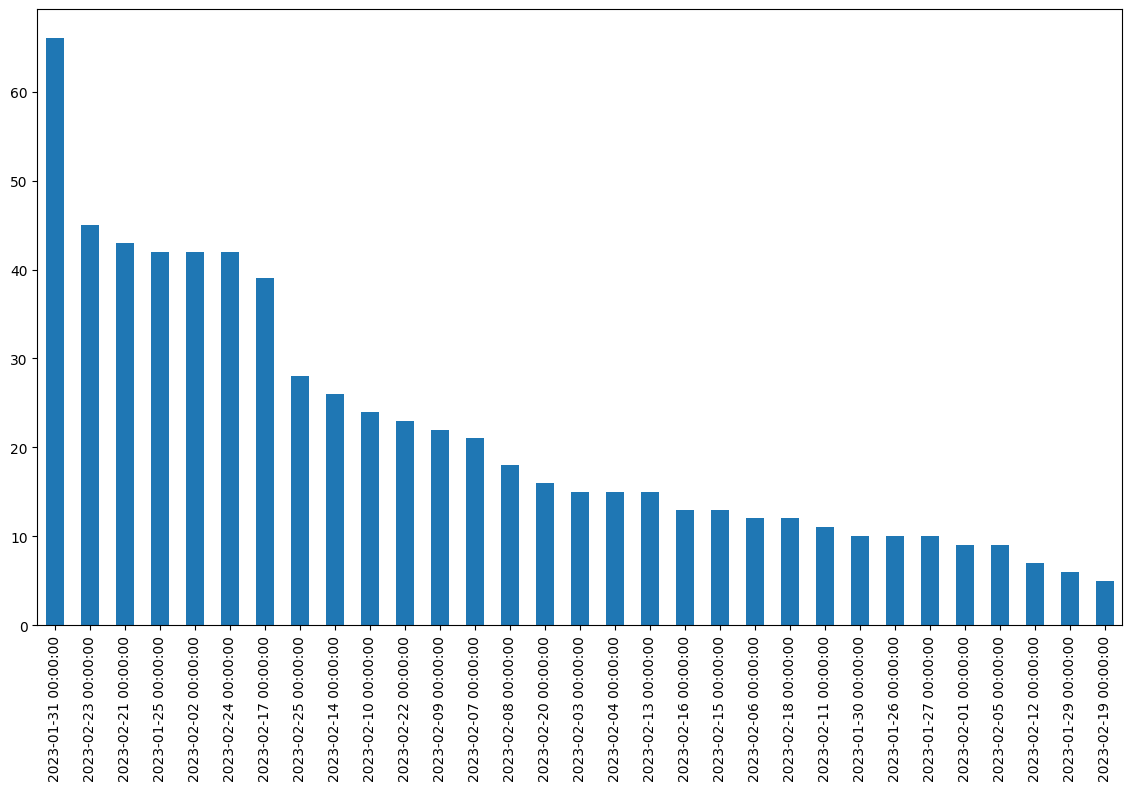

In [32]:
# Visualise the distribution of a categorical column using a bar chart
df1['pubDate'].value_counts().plot(kind='bar', figsize=(14, 8))
plt.show()

### Sort the dataframe by the date column in ascending order

In [33]:
df1 = df1.sort_values(by='pubDate')

### Reset index...

In [34]:
df1.reset_index(drop=True)

,title,link,description,pubDate,location
0,Clearing Specialist,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Web3 Exchange Jobs Blockchain Finance Jobs Blockchain Data Jobs Blockchain Accounting Jobs Crypt...,2023-01-25,Singapore
1,Finance Business Partner Corporate,https://cryptojobslist.com/jobs/finance-business-partner-corporate-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Blockchain Trading Jobs Blockchain Exchange Jobs Web3 Executive Jobs Blockchain Senior J...,2023-01-25,Singapore
2,Finance Manager Corporate FPA,https://cryptojobslist.com/jobs/finance-manager-corporate-fp-a-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Web3 Trading Jobs Cryptocurrency Developer Jobs Cryptocurrency Engineering Jobs Crypt...,2023-01-25,Singapore
3,Support Adventure REMOTE IT Helpdesk Technician Level 2 to Level 3 Engineers,https://weworkremotely.com/remote-jobs/support-adventure-remote-it-helpdesk-technician-level-2-to-level-3-engineers,Headquarters London UK URL httpswwwsupportadventurecom Are you an IT professional looking for an engaging career opportunity while working remo...,2023-01-25,NaN
4,Salesflowio Business Analyst Requirement Elicitation and Technical User Story Writeup,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-01-25,NaN
5,Relay Commerce Staff Engineer,https://weworkremotely.com/remote-jobs/relay-commerce-staff-engineer-1,Headquarters Atlanta GA URL httpsrelaycommerceio About the Role The staff engineer is a technical leader within the organization able to desi...,2023-01-25,NaN
6,Data Java Engineer Binance Accelerator Programme,https://cryptojobslist.com/jobs/data-java-engineer-binance-accelerator-programme-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Cryptocurrency Developer Jobs Cryptocurrency Engineering Jobs Blockchain Exchange Jobs Cryp...,2023-01-25,Singapore
7,Treasury Analyst,https://cryptojobslist.com/jobs/treasury-analyst-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Web3 Analyst Jobs Blockchain Exchange Jobs Blockchain Finance Jobs Cryptocurrency Data ...,2023-01-25,Singapore
8,Technical Evangelist Asia,https://cryptojobslist.com/jobs/technical-evangelist-asia-binance-singapore,Tags Cryptocurrency Jobs Web3 Devops Jobs Blockchain Trading Jobs Cryptocurrency Community Jobs Web3 Content Jobs Web3 Developer Jobs Web3 ...,2023-01-25,Singapore
9,Asset Management Specialist,https://cryptojobslist.com/jobs/asset-management-specialist-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Cryptocurrency Exchange Jobs Web3 Finance Jobs Web3 Accounting Jobs Web3 Full Time Jobs Bin...,2023-01-25,Singapore


# GIVE ME THOSE JOBSSSS

## Only WorldWide - 2023

#### Given that some dates are NaN it is impossible to create a perfectly tailored df of solely worldwide jobs

##### I have tried to narrow down the search but there is still some jobs that are not fully worldwide. Although, the majority is indeed from anywhere in the world.

In [35]:
key_words = ['worldwide', 'international', 'anywhere']
regex = '|'.join(key_words)


worldwide = df1[df1['title'].str.contains(regex, case=False) | df1['description'].str.contains(regex, case=False) | df1['location'].str.contains(regex, case=False)]

In [36]:
worldwide.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/3825536958.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  worldwide.describe()


,title,link,description,pubDate,location
count,254,254,254,145,254
unique,241,254,253,25,30
top,Senior Software Engineer,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,NaN,2023-01-25 00:00:00,Worldwide
freq,6,1,2,34,87
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-25 00:00:00,NaN


In [37]:
worldwide

,title,link,description,pubDate,location
0,Clearing Specialist,https://cryptojobslist.com/jobs/clearing-specialist-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Web3 Exchange Jobs Blockchain Finance Jobs Blockchain Data Jobs Blockchain Accounting Jobs Crypt...,2023-01-25,Singapore
23,Finance Business Partner Corporate,https://cryptojobslist.com/jobs/finance-business-partner-corporate-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Blockchain Trading Jobs Blockchain Exchange Jobs Web3 Executive Jobs Blockchain Senior J...,2023-01-25,Singapore
24,Finance Manager Corporate FPA,https://cryptojobslist.com/jobs/finance-manager-corporate-fp-a-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Web3 Trading Jobs Cryptocurrency Developer Jobs Cryptocurrency Engineering Jobs Crypt...,2023-01-25,Singapore
25,Support Adventure REMOTE IT Helpdesk Technician Level 2 to Level 3 Engineers,https://weworkremotely.com/remote-jobs/support-adventure-remote-it-helpdesk-technician-level-2-to-level-3-engineers,Headquarters London UK URL httpswwwsupportadventurecom Are you an IT professional looking for an engaging career opportunity while working remo...,2023-01-25,NaN
26,Salesflowio Business Analyst Requirement Elicitation and Technical User Story Writeup,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-01-25,NaN
30,Treasury Analyst,https://cryptojobslist.com/jobs/treasury-analyst-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Web3 Analyst Jobs Blockchain Exchange Jobs Blockchain Finance Jobs Cryptocurrency Data ...,2023-01-25,Singapore
31,Technical Evangelist Asia,https://cryptojobslist.com/jobs/technical-evangelist-asia-binance-singapore,Tags Cryptocurrency Jobs Web3 Devops Jobs Blockchain Trading Jobs Cryptocurrency Community Jobs Web3 Content Jobs Web3 Developer Jobs Web3 ...,2023-01-25,Singapore
22,Asset Management Specialist,https://cryptojobslist.com/jobs/asset-management-specialist-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Cryptocurrency Exchange Jobs Web3 Finance Jobs Web3 Accounting Jobs Web3 Full Time Jobs Bin...,2023-01-25,Singapore
32,Manager Commercial Finance,https://cryptojobslist.com/jobs/manager-commercial-finance-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Cryptocurrency Trading Jobs Cryptocurrency Exchange Jobs Web3 Executive Jobs Web3 Sen...,2023-01-25,Singapore
35,Java Engineer Financial Product,https://cryptojobslist.com/jobs/java-engineer-financial-product-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Web3 Developer Jobs Blockchain Engineering Jobs Blockchain Exchange Jobs Web3 Golang Jobs Crypto...,2023-01-25,Singapore


## Analyst - WorldWide

In [38]:

analyst = worldwide[worldwide['title'].str.contains('analyst', case=False) | worldwide['description'].str.contains('analyst', case=False)]


In [39]:
analyst.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/1449045089.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  analyst.describe()


,title,link,description,pubDate,location
count,16,16,16,12,16
unique,16,16,16,8,7
top,Salesflowio Business Analyst Requirement Elicitation and Technical User Story Writeup,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-01-25 00:00:00,NaN
freq,1,1,1,3,6
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-25 00:00:00,NaN


In [40]:
analyst

,title,link,description,pubDate,location
26,Salesflowio Business Analyst Requirement Elicitation and Technical User Story Writeup,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-01-25,NaN
30,Treasury Analyst,https://cryptojobslist.com/jobs/treasury-analyst-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Web3 Analyst Jobs Blockchain Exchange Jobs Blockchain Finance Jobs Cryptocurrency Data ...,2023-01-25,Singapore
20,Data Analyst Lead,https://cryptojobslist.com/jobs/data-analyst-lead-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Analyst Jobs Web3 Developer Jobs Web3 Engineering Jobs Blockchain Exchange Jobs W...,2023-01-25,Singapore
134,Java Development Engineer SecurityBinance Accelerator Programme,https://cryptojobslist.com/jobs/java-development-engineer-security-binance-accelerator-programme-binance-asia,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Web3 Security Jobs Blockchain Developer Jobs Cryptocurrency Exchange Jobs Cryptocurrenc...,2023-01-31,Asia
89,General Application,https://cryptojobslist.com/jobs/general-application-treehouse-singapore,Tags Cryptocurrency Jobs Web3 Marketing Jobs Cryptocurrency Research Jobs Blockchain Internship Jobs Cryptocurrency Analyst Jobs Cryptocurre...,2023-01-31,Singapore
244,Cybercrimes Investigator,https://cryptojobslist.com/jobs/cybercrimes-investigator-chainalysis-washington-d-c-remote,Tags Cryptocurrency Jobs Blockchain Remote Jobs Cryptocurrency Research Jobs Cryptocurrency Sales Jobs Cryptocurrency Engineering Jobs Web3 ...,2023-02-06,Washington DC Remote
400,AgencyAnalytics SaaS Revenue Operations Manager,https://weworkremotely.com/remote-jobs/agencyanalytics-saas-revenue-operations-manager,Headquarters Toronto Canada URL httpsagencyanalyticscom Were seeking a key player to work within a team spanning Marketing Sales and Customer S...,2023-02-15,NaN
442,Accounts Payable Analyst,https://cryptojobslist.com/jobs/accounts-payable-analyst-parity-technologies-london-england-united-kingdom,Tags Cryptocurrency Jobs Blockchain Analyst Jobs Blockchain Operations Jobs Blockchain Finance Jobs Web3 Accounting Jobs Web3 Full Time Jobs...,2023-02-17,London England United Kingdom
533,Junior Content Creator,https://cryptojobslist.com/jobs/junior-content-creator-dappradar-remote,Tags Cryptocurrency Jobs Blockchain Remote Jobs Cryptocurrency Content Jobs Web3 Web3 Jobs Blockchain Defi Jobs Blockchain Full Time Jobs Da...,2023-02-22,NaN
581,Senior Product Data Analyst at Hotjar,https://nodesk.co/remote-jobs/hotjar-senior-product-data-analyst/,Hotjar is hiring a remote Senior Product Data Analyst This is a fulltime position that can be done remotely anywhere in EMEA Hotjar We help you u...,2023-02-23,NaN


## Sales - Worldwide

In [41]:
sales = worldwide[worldwide['title'].str.contains('sales', case=False) | worldwide['description'].str.contains('sales', case=False)]

In [42]:
sales.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/3195154911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales.describe()


,title,link,description,pubDate,location
count,31,31,31,18,31
unique,30,31,31,13,5
top,Sales Representative,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-02-24 00:00:00,NaN
freq,2,1,1,3,17
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-25 00:00:00,NaN


In [43]:
sales

,title,link,description,pubDate,location
26,Salesflowio Business Analyst Requirement Elicitation and Technical User Story Writeup,https://weworkremotely.com/remote-jobs/salesflow-io-business-analyst-requirement-elicitation-and-technical-user-story-write-up,Headquarters London URL httpssalesflowio We are seeking a Business Analyst to join our team at Salesflowio The ideal candidate will have experie...,2023-01-25,NaN
161,Technical Product Lead Sygma,https://cryptojobslist.com/jobs/technical-product-lead-sygma-chainsafe-systems-remote,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Cryptocurrency Marketing Jobs Web3 Research Jobs Cryptocurrency Sales Jobs Web3 Communit...,2023-02-02,Remote
224,Customer Marketing Manager,https://cryptojobslist.com/jobs/customer-marketing-manager-chainalysis-remote-usa,Tags Cryptocurrency Jobs Blockchain Remote Jobs Cryptocurrency Marketing Jobs Web3 Sales Jobs Blockchain Content Jobs Blockchain Operations ...,2023-02-04,Remote USA
244,Cybercrimes Investigator,https://cryptojobslist.com/jobs/cybercrimes-investigator-chainalysis-washington-d-c-remote,Tags Cryptocurrency Jobs Blockchain Remote Jobs Cryptocurrency Research Jobs Cryptocurrency Sales Jobs Cryptocurrency Engineering Jobs Web3 ...,2023-02-06,Washington DC Remote
236,Director of Health Plan Strategy Sales New 911 Telehealth Technology at MD Ally Technologies Inc Anywhere,https://www.crunchboard.com/jobs/193311778-director-of-health-plan-strategy-sales-new-911-telehealth-technology-at-md-ally-technologies-inc,ABOUT MD ALLY Each year millions of nonemergency calls are made to 911 that decrease ambulance availability overcrowd EDs and drive billions in,2023-02-06,NaN
281,Web designer developer frontend backend with Graphic design skills Writer,https://cryptojobslist.com/jobs/web-designer-developer-frontend-backed-with-graphic-design-skills-writer-gd10-capital-worldwide,Tags Cryptocurrency Jobs Web3 Marketing Jobs Blockchain Sales Jobs Blockchain Content Jobs Web3 Developer Jobs Blockchain Ui Ux Jobs Blockc...,2023-02-08,Worldwide
328,Sales Representative,https://cryptojobslist.com/jobs/sales-representative-aurora-labs-remote-1,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Blockchain Sales Jobs Web3 Business Development Jobs Blockchain Full Time Jobs Cryptocur...,2023-02-10,Remote
400,AgencyAnalytics SaaS Revenue Operations Manager,https://weworkremotely.com/remote-jobs/agencyanalytics-saas-revenue-operations-manager,Headquarters Toronto Canada URL httpsagencyanalyticscom Were seeking a key player to work within a team spanning Marketing Sales and Customer S...,2023-02-15,NaN
411,Aha Senior Product Marketing Manager,https://weworkremotely.com/remote-jobs/aha-senior-product-marketing-manager,Headquarters United States URL httpwwwahaio Aha is a very different type of highgrowth SaaS company We are selffunded highly profitable and 10...,2023-02-16,NaN
406,Aha Creative Director,https://weworkremotely.com/remote-jobs/aha-creative-director,Headquarters United States URL httpwwwahaio Aha is a very different type of highgrowth SaaS company We are selffunded highly profitable and 100...,2023-02-16,NaN


## Python - Worldwide

In [44]:
python = worldwide[worldwide['title'].str.contains('python', case=False) | worldwide['description'].str.contains('python', case=False)]

In [45]:
python.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/349435123.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  python.describe()


,title,link,description,pubDate,location
count,31,31,31,14,31
unique,31,31,31,7,6
top,Senior Machine Learning Engineer Anomaly Detection,https://cryptojobslist.com/jobs/senior-machine-learning-engineer-anomaly-detection-binance-singapore,Tags Cryptocurrency Jobs Web3 Remote Jobs Cryptocurrency Trading Jobs Web3 Full Time Jobs Web3 Developer Jobs Blockchain Exchange Jobs Bloc...,2023-01-25 00:00:00,Worldwide
freq,1,1,1,6,12
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-23 00:00:00,NaN


In [46]:
python

,title,link,description,pubDate,location
40,Senior Machine Learning Engineer Anomaly Detection,https://cryptojobslist.com/jobs/senior-machine-learning-engineer-anomaly-detection-binance-singapore,Tags Cryptocurrency Jobs Web3 Remote Jobs Cryptocurrency Trading Jobs Web3 Full Time Jobs Web3 Developer Jobs Blockchain Exchange Jobs Bloc...,2023-01-25,Singapore
28,Binance Accelerator Programme Quality Assurance Engineer Big Data,https://cryptojobslist.com/jobs/binance-accelerator-programme-quality-assurance-engineer-big-data-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Blockchain Operations Jobs Cryptocurrency Developer Jobs Blockchain Engineering Jobs We...,2023-01-25,Singapore
1,Binance Accelerator Programme Quality Assurance Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-quality-assurance-engineer-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Operations Jobs Blockchain Developer Jobs Web3 Engineering Jobs Web3 Exchange Jobs...,2023-01-25,Singapore
20,Data Analyst Lead,https://cryptojobslist.com/jobs/data-analyst-lead-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Analyst Jobs Web3 Developer Jobs Web3 Engineering Jobs Blockchain Exchange Jobs W...,2023-01-25,Singapore
6,Binance Accelerator Programme Security Researcher,https://cryptojobslist.com/jobs/binance-accelerator-programme-security-researcher-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Blockchain Research Jobs Web3 Security Jobs Web3 Developer Jobs Cryptocurrency Engineer...,2023-01-25,Singapore
14,Binance Accelerator Programme Data Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-data-engineer-binance-singapore,Tags Cryptocurrency Jobs Blockchain Remote Jobs Web3 Trading Jobs Web3 Internship Jobs Blockchain Developer Jobs Blockchain Exchange Jobs C...,2023-01-25,Singapore
56,DeFi Researcher Data Scientist,https://cryptojobslist.com/jobs/defi-researcher-data-scientist-almanak-remote,Tags Cryptocurrency Jobs Web3 Remote Jobs Cryptocurrency Research Jobs Blockchain Data Jobs Blockchain Defi Jobs At Almanak we utilize knowle...,2023-01-27,NaN
135,Binance Accelerator Programme Smart Contract Security Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-smart-contract-security-engineer-binance-georgia-tbilisi,Tags Cryptocurrency Jobs Cryptocurrency Trading Jobs Blockchain Community Jobs Web3 Security Jobs Web3 Developer Jobs Blockchain Exchange Jo...,2023-01-31,Georgia Tbilisi
182,Senior Software Engineer Lotus,https://cryptojobslist.com/jobs/senior-software-engineer-lotus-protocol-labs-remote,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Web3 Research Jobs Cryptocurrency Community Jobs Web3 Security Jobs Web3 Developer Jobs ...,2023-02-02,Remote
188,Binance Accelerator Programme SRE Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-sre-engineer-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Devops Jobs Blockchain Trading Jobs Web3 Operations Jobs Cryptocurrency Security Jobs Cryptocurrency...,2023-02-02,Singapore


## SQL - Worldwide

In [47]:
sql = worldwide[worldwide['title'].str.contains('sql', case=False) | worldwide['description'].str.contains('sql', case=False)]

In [48]:
sql.describe()

/var/folders/3x/_059946j4lvcjpvshx_dj5f40000gn/T/ipykernel_82841/1629035654.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sql.describe()


,title,link,description,pubDate,location
count,34,34,34,22,34
unique,34,34,34,10,6
top,Finance Manager Corporate FPA,https://cryptojobslist.com/jobs/finance-manager-corporate-fp-a-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Web3 Trading Jobs Cryptocurrency Developer Jobs Cryptocurrency Engineering Jobs Crypt...,2023-01-25 00:00:00,NaN
freq,1,1,1,8,10
first,NaN,NaN,NaN,2023-01-25 00:00:00,NaN
last,NaN,NaN,NaN,2023-02-24 00:00:00,NaN


In [49]:
sql

,title,link,description,pubDate,location
24,Finance Manager Corporate FPA,https://cryptojobslist.com/jobs/finance-manager-corporate-fp-a-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Web3 Trading Jobs Cryptocurrency Developer Jobs Cryptocurrency Engineering Jobs Crypt...,2023-01-25,Singapore
32,Manager Commercial Finance,https://cryptojobslist.com/jobs/manager-commercial-finance-binance-singapore,Tags Cryptocurrency Jobs Cryptocurrency Marketing Jobs Cryptocurrency Trading Jobs Cryptocurrency Exchange Jobs Web3 Executive Jobs Web3 Sen...,2023-01-25,Singapore
35,Java Engineer Financial Product,https://cryptojobslist.com/jobs/java-engineer-financial-product-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Web3 Developer Jobs Blockchain Engineering Jobs Blockchain Exchange Jobs Web3 Golang Jobs Crypto...,2023-01-25,Singapore
21,Technical Support Engineer SL3 Application Owner,https://cryptojobslist.com/jobs/technical-support-engineer-sl3-application-owner-binance-singapore,Tags Cryptocurrency Jobs Blockchain Trading Jobs Cryptocurrency Product Manager Jobs Web3 Developer Jobs Web3 Exchange Jobs Blockchain Javas...,2023-01-25,Singapore
20,Data Analyst Lead,https://cryptojobslist.com/jobs/data-analyst-lead-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Analyst Jobs Web3 Developer Jobs Web3 Engineering Jobs Blockchain Exchange Jobs W...,2023-01-25,Singapore
14,Binance Accelerator Programme Data Engineer,https://cryptojobslist.com/jobs/binance-accelerator-programme-data-engineer-binance-singapore,Tags Cryptocurrency Jobs Blockchain Remote Jobs Web3 Trading Jobs Web3 Internship Jobs Blockchain Developer Jobs Blockchain Exchange Jobs C...,2023-01-25,Singapore
17,Data Warehouse Architect,https://cryptojobslist.com/jobs/data-warehouse-architect-binance-singapore,Tags Cryptocurrency Jobs Web3 Trading Jobs Cryptocurrency Exchange Jobs Cryptocurrency Finance Jobs Web3 Data Jobs Cryptocurrency Full Time ...,2023-01-25,Singapore
18,Senior Java Engineer Core Exchange System,https://cryptojobslist.com/jobs/senior-java-engineer-core-exchange-system-binance-singapore,Tags Cryptocurrency Jobs Web3 Remote Jobs Cryptocurrency Trading Jobs Cryptocurrency Security Jobs Cryptocurrency Developer Jobs Cryptocurre...,2023-01-25,Singapore
60,Senior Backend Developer Remote,https://cryptojobslist.com/jobs/senior-backend-developer-remote-dappradar-remote-1,Tags Cryptocurrency Jobs Cryptocurrency Remote Jobs Cryptocurrency Developer Jobs Blockchain Web3 Jobs Cryptocurrency Senior Jobs Web3 Nft J...,2023-01-27,NaN
116,Full Stack Software Engineer,https://cryptojobslist.com/jobs/full-stack-software-engineer-ethglobal-remote-us-canada,Tags Cryptocurrency Jobs Web3 Remote Jobs Cryptocurrency Marketing Jobs Cryptocurrency Community Jobs Cryptocurrency Full Time Jobs Blockcha...,2023-01-31,Remote US Canada
